# Iris / Task 2.2

In [49]:
import numpy as np
# Reproducibilidad
np.random.seed(42)

## 1. Dataset

### a. Carga Dataset Iris
Podemos cargar el dataset desde SKLearn

In [50]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = [iris.target_names[i] for i in iris.target]

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### b. Seleccione solo dos clases para que sea un problema binario
Vamos a seleccionar Setosa y Versicolor, poca originalidad ya que estas son las de ejemplo del laboratorio.

In [51]:
# Filtro con solo Setosa y Versicolor
df_binary = df[df['species'].isin(['setosa', 'versicolor'])].copy()

# Sanity check
print(df_binary['species'].unique())
print(f"Total de datos: {df_binary.shape[0]}")

<StringArray>
['setosa', 'versicolor']
Length: 2, dtype: str
Total de datos: 100


### c. Seleccione solo dos features
Nuevamente, al ser muy originales seleccionamos los features mencionados en el laboratorio Sepal Length y Sepal Width. Aquí aprovechamos a separar en features / target y normalizar nuestros valores.

In [52]:
# Seleccionar solo las sepal length y sepal width
X = df_binary[['sepal length (cm)', 'sepal width (cm)']].values

# setosa = 0, versicolor = 1
y = df_binary['species'].map({'setosa': 0, 'versicolor': 1}).values.reshape(-1, 1)

# 3. Normalizar
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

## 2. Implementación de Perceptrón

In [53]:
import numpy as np

class Perceptron:
    # Inicialización con lr y epochs
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    # Step function
    def _step_function(self, z):
        return 1 if z >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Inicialización aleatoria de pesos y bias
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

        # Loop de entrenamiento
        for epoch in range(self.epochs):
            for i in range(n_samples):
                # Cálculo del output lineal: z = w·x + b
                linear_output = np.dot(X[i], self.weights) + self.bias

                # Funcion step para predicciones
                y_pred = self._step_function(linear_output)

                # Regla de actualización del Perceptron
                # w = w + lr(y_real - y_pred) * x
                update = self.lr * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        # Cálculo vectorial para predicciones
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

## 3. Visualización y Métricas

### a. Entrenamiento del Modelo

In [54]:
# Inicializar perceptron
perceptron = Perceptron(learning_rate=0.001, epochs = 10000)

# Fit a los datos
perceptron.fit(X_norm, y)

# Sanity check / prints del output
print(f"Pesos finales: {perceptron.weights}. Bias final: {perceptron.bias}")

Pesos finales: [ 0.60789822 -0.37729357]. Bias final: [0.28868854]


### b. Gráfica de puntos y línea de perceptrón.
Aquí como para todas mis gráficas de Matplotlib utilicé AI, prácticamente lo mismo de siempre. Intentar ser descriptivo y compartir implementaciones / detalles de la información con la que se interactúa para graficar al igual que detalles sobre el output para que la IA tenga "constraints" sobre los cuales trabaja.

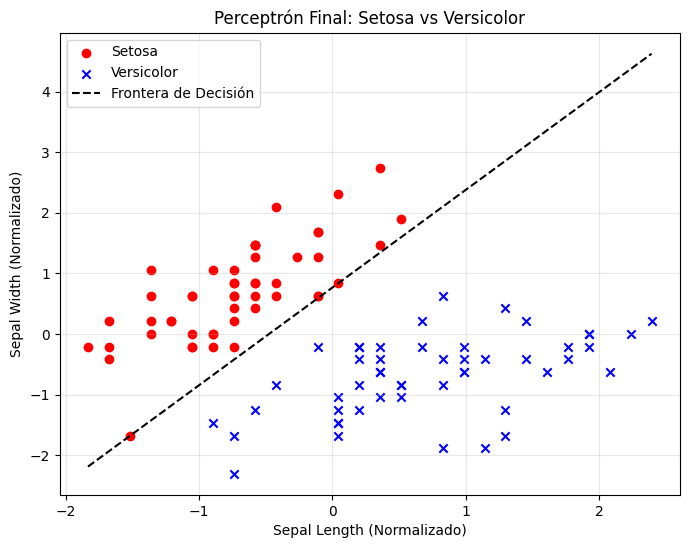

In [55]:
import matplotlib.pyplot as plt

w = perceptron.weights
b = perceptron.bias

plt.figure(figsize=(8, 6))

plt.scatter(X_norm[y.flatten() == 0, 0], X_norm[y.flatten() == 0, 1], color='red', label='Setosa')
plt.scatter(X_norm[y.flatten() == 1, 0], X_norm[y.flatten() == 1, 1], color='blue', marker='x', label='Versicolor')

x1_vals = np.linspace(X_norm[:, 0].min(), X_norm[:, 0].max(), 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]

plt.plot(x1_vals, x2_vals, color='black', linestyle='--', label='Frontera de Decisión')

# labels
plt.xlabel('Sepal Length (Normalizado)')
plt.ylabel('Sepal Width (Normalizado)')
plt.title('Perceptrón Final: Setosa vs Versicolor')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Podemos ver que los datos se dividen exactamente entre dos clusters bastante claramente definidos, nuestra línea se ajusta bastante bien y parece dividir los datos perfectamente. Algo interesante de notar, es que la línea parece traslapar únicamente con puntos rojos. Es decir, se quedó justamente en el borde para realizar una predicción perfecta (puede parecer que no visualmente) ya que deja de actualizarse nomás clasifica correctamente el dataset. Es decir, exactamente en el punto dónde ya no hubo clasificaciones incorrectas para puntos individuales el modelo dejó de actualizarse.

Esto puede no ser beneficioso, ya que su tuviésemos una Setosa que se encontrara justamente a la par de una Setosa "fronteriza" sería clasificada como Versicolor. Esto resalta también una de las ventajas que tiene SVM sobre este tipo de algoritmos, ya que nos da una mejor capacidad de generalizar ante datos nuevos que no hemos visto. Esta desventaja también se pudo haber visto si hubiésemos dividido el conjunto en Train - Test, de cierta manera aquí el modelo queda "sobreajustado" a los datos :)

### c. Reporte de Accuracy
Luego de haberlo graficado y conociendo como funcionan los perceptrones (al igual que 10k épocas), es bastante claro que el accuracy será 100% o muy cercano.

In [56]:
# Realizar predicciones
y_preds = perceptron.predict(X_norm)

# Calcular accuracy
accuracy = np.mean(y_preds == y.flatten()) * 100
print(f"Accuracy: {accuracy}%")

Accuracy: 100.0%


Efectivamente, el accuracy es del 100%. Esto se da debido a que los datos (claramente) son linealmente separables, tenemos una amplia frontera dónde el modelo podría tomar múltiples valores de Weights y Bias y aún así tener un accuracy perfecto. Adicionalmente, como se mencionó en el inciso anterior, a pesar de tener un 100% de accuracy puede que el modelo no sea el mejor para realizar predicciones a futuro ya que la "separación" entre los demás datos no es mucha. Por defecto de diseño del perceptrón, en el momento que dejan de haber errores en las predicciones los weights y bias dejan de actualizarse completamente y se queda en la primera solución encontrada. Esto también quiere decir que si fuésemos a entrenar este modelo múltiples veces, probablemente encontraría líneas diferentes que aún así separarían los datos perfectamente.